In [1]:
import pandas as pd
import numpy as np
import model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2023-04-21 14:11:45.230787: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
X, y = pd.read_csv("../data_predictor/abundances.csv"),pd.read_csv("../data/target.csv")
v_inner = np.array([1.100e+09, 1.145e+09, 1.190e+09, 1.235e+09, 1.280e+09, 1.325e+09,
       1.370e+09, 1.415e+09, 1.460e+09, 1.505e+09, 1.550e+09, 1.595e+09,
       1.640e+09, 1.685e+09, 1.730e+09, 1.775e+09, 1.820e+09, 1.865e+09,
       1.910e+09, 1.955e+09])

# Making the model more complex

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_nn = np.log10(X)
#y_log = np.log10(y.values)
#y_nn = np.concatenate((y_log, y.values[:, 20:]), axis=1)
y_nn = y.values#y_log
X_nn = scaler_x.fit_transform(X_nn)
y_nn = scaler_y.fit_transform(y_nn)
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

In [5]:
radiative_model = model.build_custom_model(X,y_train ,[500, 500, 500 ,500,250,100, 75, 40], True, 'softplus', 'nadam')

2023-04-21 14:13:18.439532: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-21 14:13:18.450037: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-21 14:13:18.768760: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-21 14:13:18.768833: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lac-300): /proc/driver/nvidia/version does not exist
2023-04-21 14:13:18.769957: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
202

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


2023-04-21 14:13:19.618015: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-21 14:13:19.619117: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2399955000 Hz


Epoch 1/100
80/80 [==============================] - 12s 118ms/step - loss: 1.2721 - val_loss: 1.1041
Epoch 2/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9979 - val_loss: 1.0726
Epoch 3/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9839 - val_loss: 1.0751
Epoch 4/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9679 - val_loss: 1.0698
Epoch 5/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9839 - val_loss: 1.0626
Epoch 6/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9839 - val_loss: 1.0649
Epoch 7/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9861 - val_loss: 1.0780
Epoch 8/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9936 - val_loss: 1.0775
Epoch 9/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9687 - val_loss: 1.0649
Epoch 10/100
80/80 [==============================] - 1s 16ms/step - loss: 0.9925 - val_loss: 1.06

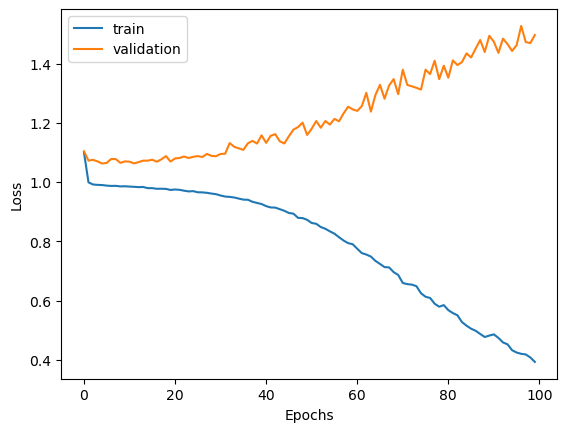

<Figure size 640x480 with 0 Axes>

In [6]:
model.train_model(radiative_model, X_train, y_train, X_test, y_test, True, epochs=100)

In [7]:
X_unscaled = scaler_x.inverse_transform(X_train)
y_unscaled = scaler_y.inverse_transform(y_train)
X_unscaled = 10**X_unscaled
#y_unscaled = 10**y_unscaled
y_pred_nn = radiative_model(X_train, training = False)
y_pred = scaler_y.inverse_transform(y_pred_nn)
#y_pred = 10**y_pred

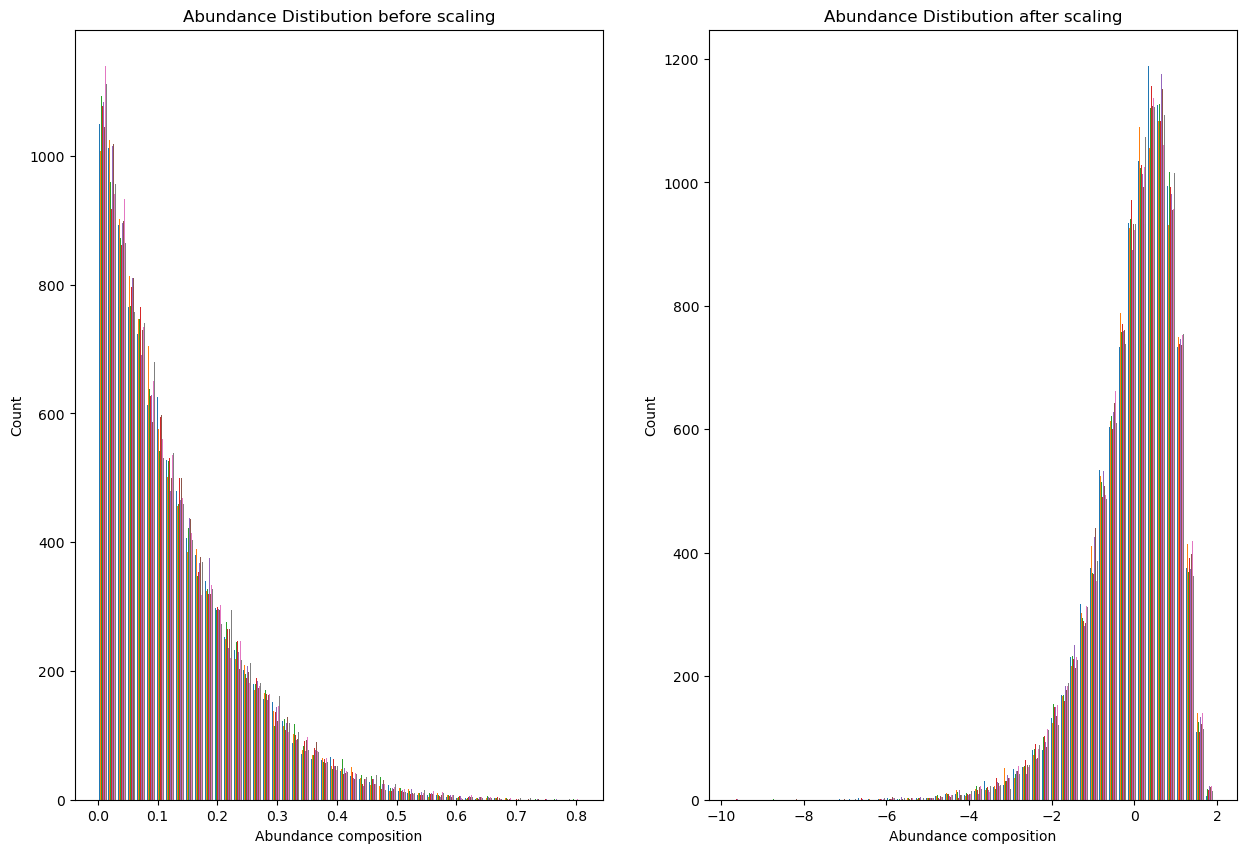

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.hist(X, bins = 50)
plt.ylabel("Count")
plt.xlabel("Abundance composition")
plt.title("Abundance Distibution before scaling")
plt.subplot(1,2,2)
plt.hist(X_nn[:,:20], bins = 50)
plt.ylabel("Count")
plt.xlabel("Abundance composition")
plt.title("Abundance Distibution after scaling")
plt.savefig('abundance-compostion.pdf');

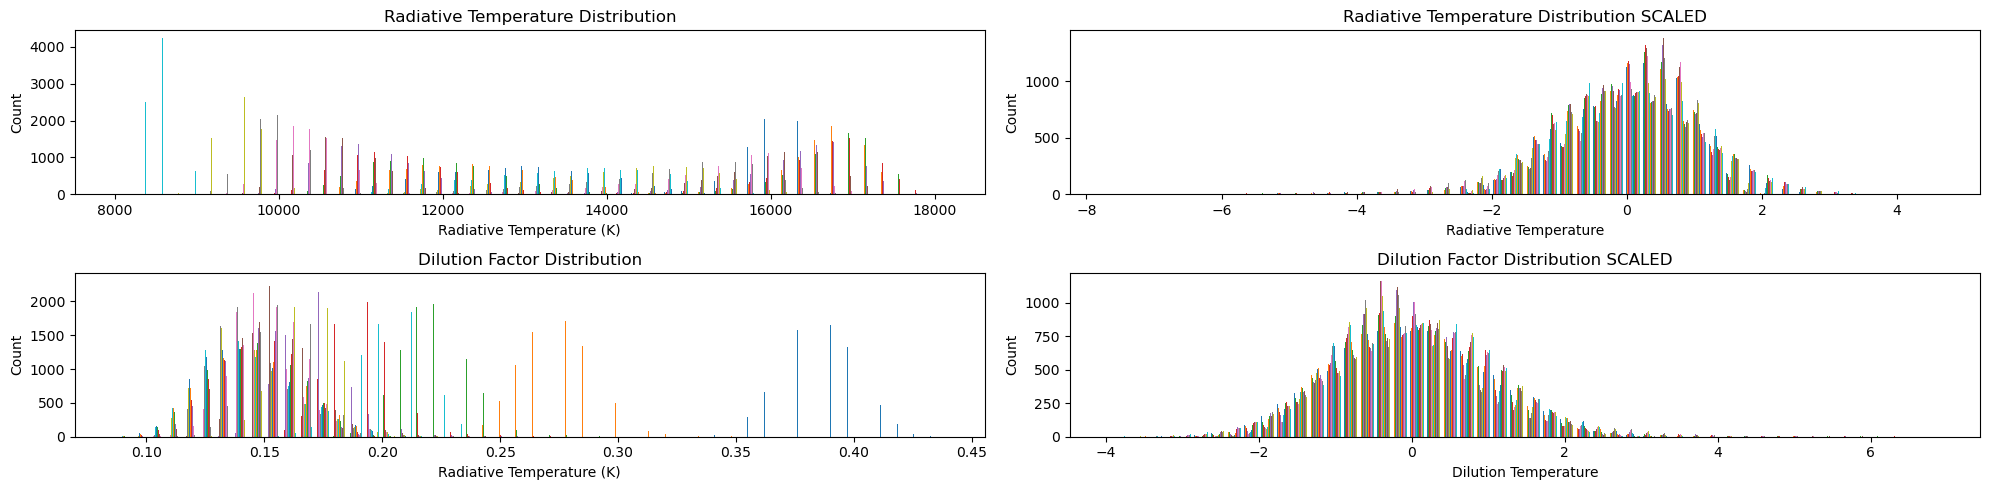

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
plt.hist(y.iloc[:,:20], bins = 50)
plt.title("Radiative Temperature Distribution")
plt.xlabel("Radiative Temperature (K)")
plt.ylabel("Count")
plt.subplot(2,2,2)
plt.hist(y_nn[:,:20], bins = 50)
plt.title("Radiative Temperature Distribution SCALED")
plt.xlabel("Radiative Temperature")
plt.ylabel("Count")
##
plt.subplot(2,2,3)
plt.hist(y.iloc[:,20:], bins = 50)
plt.title("Dilution Factor Distribution")
plt.xlabel("Radiative Temperature (K)")
plt.ylabel("Count")
plt.subplot(2,2,4)
plt.hist(y_nn[:,20:], bins = 50)
plt.title("Dilution Factor Distribution SCALED")
plt.xlabel("Dilution Temperature")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('target-dsit.pdf');

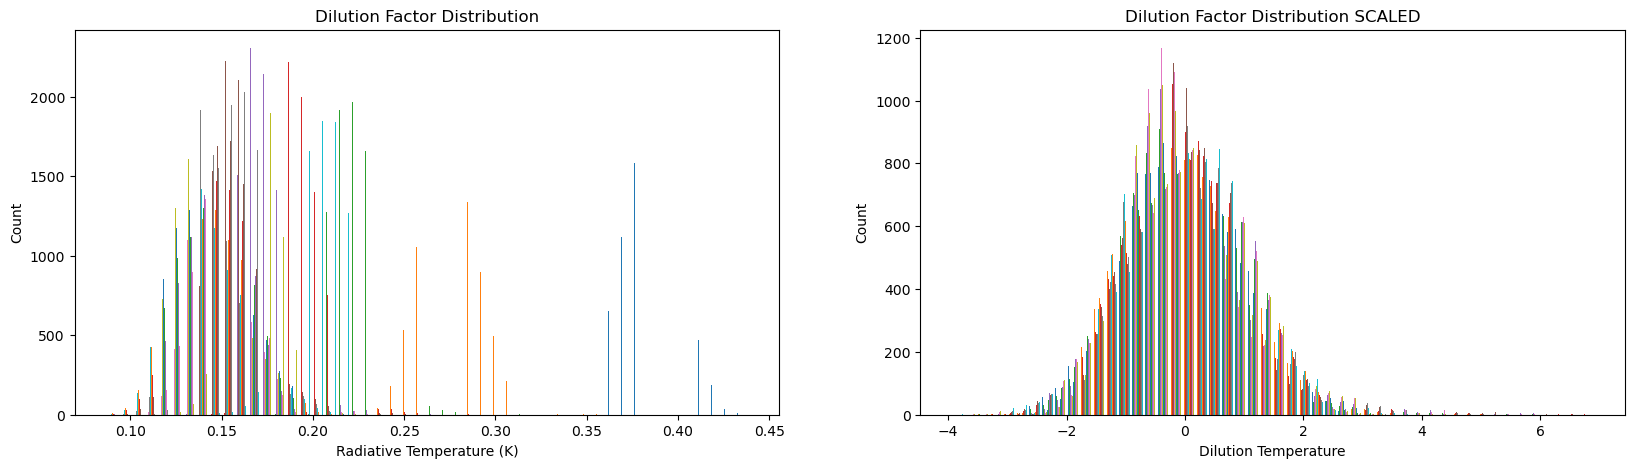

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(y.iloc[:,20:], bins = 50)
plt.title("Dilution Factor Distribution")
plt.xlabel("Radiative Temperature (K)")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(y_nn[:,20:], bins = 50)
plt.title("Dilution Factor Distribution SCALED")
plt.xlabel("Dilution Temperature")
plt.ylabel("Count");

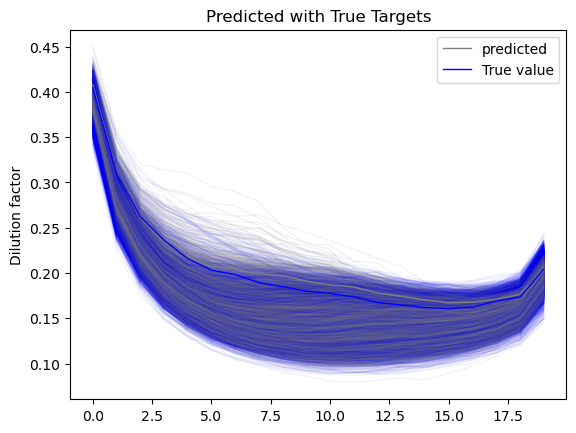

In [16]:
for i in range(8000):
    plt.plot(y_pred[i,20:], lw = 1, alpha = .1, color = 'grey')
    plt.plot(y_unscaled[i,20:], lw = 1, alpha = .05, color = 'blue')
plt.plot(y_pred[i,20:], lw = 1, alpha = 1, color = 'grey', label = 'predicted')
plt.plot(y_unscaled[i,20:], lw = 1, alpha = 1, color = 'blue', label = 'True value')
plt.ylabel("Dilution factor")
plt.title('Predicted with True Targets')
plt.legend()

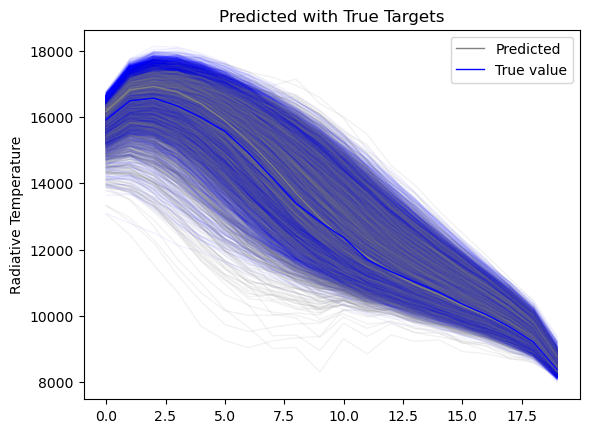

In [17]:
for i in range(8000-1):
    plt.plot(y_pred[i,:20], lw = 1, alpha = .1, color = 'grey')
    plt.plot(y_unscaled[i,:20], lw = 1, alpha = .05, color = 'blue')
plt.plot(y_pred[i,:20], lw = 1, alpha = 1, color = 'grey', label = 'Predicted')
plt.plot(y_unscaled[i,:20], lw = 1, alpha = 1, color = 'blue', label = 'True value')
plt.ylabel("Radiative Temperature")
plt.title('Predicted with True Targets')
plt.legend()

In [14]:
X_test_unscaled = scaler_x.inverse_transform(X_test)
y_test_unscaled = scaler_y.inverse_transform(y_test)
X_test_unscaled = 10**X_unscaled
#y_unscaled = 10**y_unscaled
y_test_pred_nn = radiative_model(X_test, training = False)
y_test_pred = scaler_y.inverse_transform(y_test_pred_nn)
#y_pred = 10**y_pred

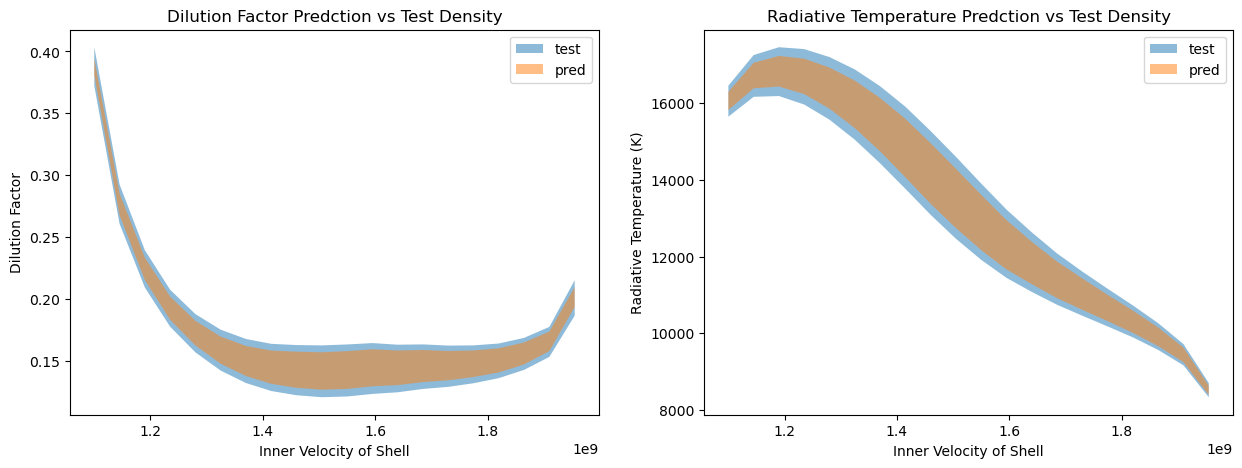

In [19]:
mean_unscaled_d = y_test_unscaled[:,20:].mean(axis=0)
mean_predicted_d = y_test_pred[:,20:].mean(axis=0)
mean_unscaled = y_test_unscaled[:,:20].mean(axis=0)
mean_predicted = y_test_pred[:,:20].mean(axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.fill_between(v_inner, y1=mean_unscaled_d + np.std(y_test_unscaled[:,20:], axis = 0), y2 = mean_unscaled_d - np.std(y_test_unscaled[:,20:], axis = 0), alpha = 0.5, label = "test")
plt.fill_between(v_inner, y1=mean_predicted_d + np.std(y_test_pred[:,20:], axis = 0), y2 = mean_predicted_d - np.std(y_test_pred[:,20:], axis = 0), alpha = 0.5, label = "pred")
plt.title("Dilution Factor Predction vs Test Density")
plt.ylabel("Dilution Factor")
plt.xlabel("Inner Velocity of Shell")
plt.legend()

plt.subplot(1,2,2)
plt.fill_between(v_inner, y1=mean_unscaled + np.std(y_test_unscaled[:,:20], axis = 0), y2 = mean_unscaled - np.std(y_test_unscaled[:,:20], axis = 0), alpha = 0.5, label = "test")
plt.fill_between(v_inner, y1=mean_predicted + np.std(y_test_pred[:,:20], axis = 0), y2 = mean_predicted - np.std(y_test_pred[:,:20], axis = 0), alpha = 0.5, label = "pred")
plt.legend()
plt.title("Radiative Temperature Predction vs Test Density")
plt.xlabel("Inner Velocity of Shell")
plt.ylabel("Radiative Temperature (K)")
plt.savefig('Predction-vs-Test-Density.jpg');

## Evaluating Mean and Max Fractional Error

In [10]:
def MaxFE(predicted, test):
    frac_err = np.abs(predicted - test) / test
    max_fe = np.max(frac_err, axis = 1)
    print(max_fe.shape)
    max_fe_idx = np.argmax(frac_err, axis = 0)
    return max_fe, max_fe_idx, frac_err

In [11]:
def MeanFE(predicted, test):
    frac_err = np.abs(predicted - test) / test
    mean_fe = np.mean(frac_err, axis = 1)
    print(mean_fe.shape)
    mean_fe_idx = np.argmax(frac_err, axis = 0)
    return mean_fe, mean_fe_idx

In [12]:
def minFE(predicted, test):
    frac_err = np.abs(predicted - test) / test
    min_fe = np.min(frac_err, axis = 1)
    min_fe_idx = np.argmin(frac_err, axis = 0)
    return min_fe, min_fe_idx, frac_err

In [15]:
max_fe_d, max_fe_idx_d, frac_err_d = MaxFE(y_test_pred[:,20:], y_test_unscaled[:,20:])
max_fe_r, max_fe_idx_r, frac_err_r = MaxFE(y_test_pred[:,:20], y_test_unscaled[:,:20])
min_fe_r, min_fe_idx_r, frac_err_min_r = minFE(y_test_pred[:,:20], y_test_unscaled[:,:20])
min_fe_d, min_fe_idx_d, frac_err_min_d = minFE(y_test_pred[:,20:], y_test_unscaled[:,20:])
print(max_fe_d)
print(max_fe_r)
print(min_fe_r)
print(min_fe_d)

(2000,)
(2000,)
[0.10122971 0.21711581 0.05305692 ... 0.26165025 0.26265108 0.19122853]
[0.05658062 0.16047562 0.02868314 ... 0.11986188 0.21809486 0.07506861]
[0.00485053 0.02173044 0.00718909 ... 0.0306891  0.0107663  0.00025557]
[8.25886567e-03 2.23309721e-03 1.17322332e-05 ... 1.15055743e-02
 8.07763382e-03 2.80715398e-02]


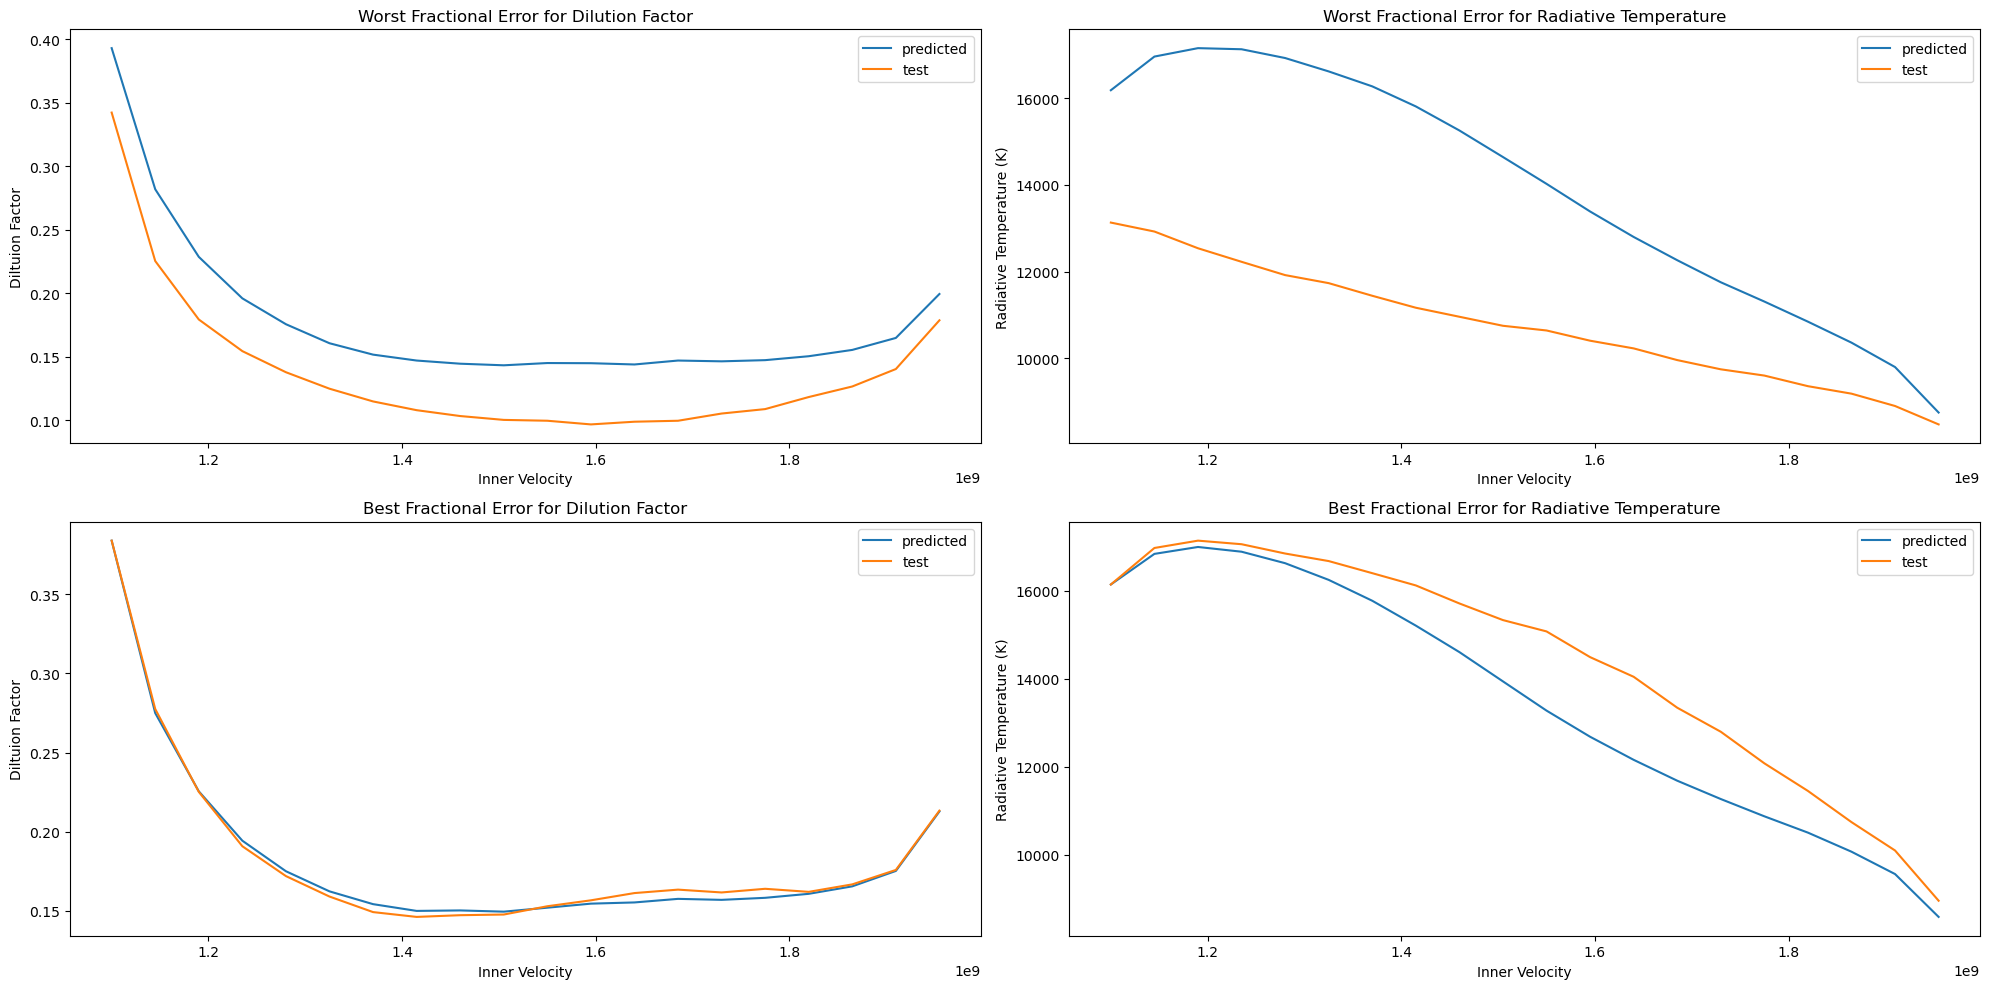

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(v_inner,y_test_pred[max_fe_idx_d[0],20:] , label = 'predicted')
plt.plot(v_inner,y_test_unscaled[max_fe_idx_d[0],20:], label = "test")
plt.legend()
plt.xlabel('Inner Velocity')
plt.ylabel('Diltuion Factor')
plt.title("Worst Fractional Error for Dilution Factor")
plt.subplot(2,2,2)
plt.plot(v_inner,y_test_pred[max_fe_idx_r[0],:20] , label = 'predicted')
plt.plot(v_inner,y_test_unscaled[max_fe_idx_r[0],:20], label = "test")
plt.legend()
plt.xlabel('Inner Velocity')
plt.ylabel('Radiative Temperature (K)')
plt.title("Worst Fractional Error for Radiative Temperature")
plt.subplot(2,2,3)
plt.plot(v_inner,y_test_pred[min_fe_idx_d[0],20:] , label = 'predicted')
plt.plot(v_inner,y_test_unscaled[min_fe_idx_d[0],20:], label = "test")
plt.legend()
plt.xlabel('Inner Velocity')
plt.ylabel('Diltuion Factor')
plt.title("Best Fractional Error for Dilution Factor")
plt.subplot(2,2,4)
plt.plot(v_inner,y_test_pred[min_fe_idx_r[0],:20] , label = 'predicted')
plt.plot(v_inner,y_test_unscaled[min_fe_idx_r[0],:20], label = "test")
plt.legend()
plt.xlabel('Inner Velocity')
plt.ylabel('Radiative Temperature (K)')
plt.title("Best Fractional Error for Radiative Temperature")
plt.tight_layout()
plt.savefig('best-worst-frac.pdf');

In [17]:
mean_fe_d, _ = MeanFE(y_test_pred[:,20:], y_test_unscaled[:,20:])
mean_fe_r, _ = MeanFE(y_test_pred[:,:20], y_test_unscaled[:,:20])

(2000,)
(2000,)


In [18]:
mean_fe_d_logged = np.log(mean_fe_d)
mean_fe_r_loogged = np.log(mean_fe_r)
max_fe_d_logged = np.log(max_fe_d)
max_fe_r_logged = np.log(max_fe_r)
bins_d = np.logspace(mean_fe_d_logged.min(), mean_fe_d_logged.max(), int(np.sqrt(len(mean_fe_d))))
bins_r = np.logspace(mean_fe_r_loogged.min(), mean_fe_r_loogged.max(), int(np.sqrt(len(mean_fe_r))))
bins_max_d = np.logspace(max_fe_d_logged.min(), max_fe_d_logged.max(), int(np.sqrt(len(max_fe_d))))
bins_max_r = np.logspace(max_fe_r_logged.min(), max_fe_r_logged.max(), int(np.sqrt(len(max_fe_r))))

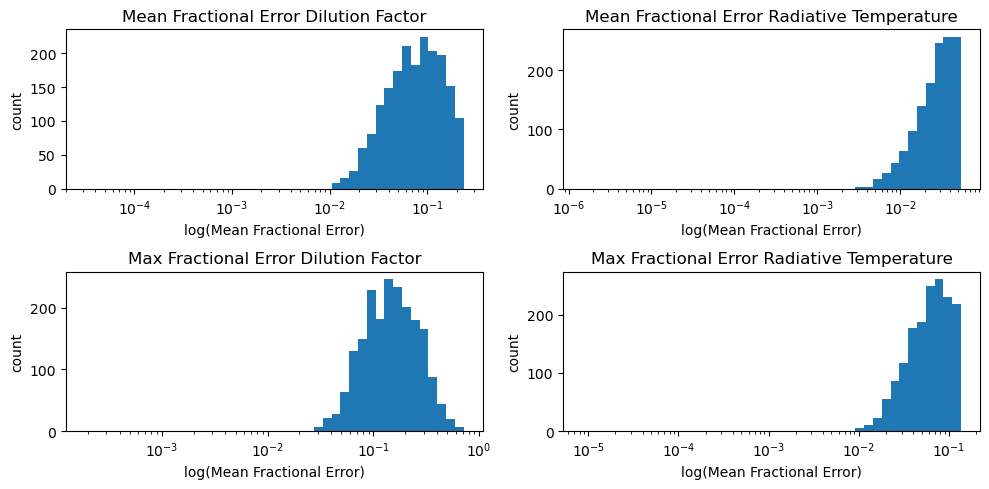

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.hist(mean_fe_d, bins = bins_d)
plt.xscale('log')
plt.title('Mean Fractional Error Dilution Factor')
plt.xlabel('log(Mean Fractional Error)')
plt.ylabel('count')
plt.subplot(2,2,2)
plt.hist(mean_fe_r, bins = bins_r)
plt.xscale('log')
plt.title('Mean Fractional Error Radiative Temperature')
plt.xlabel('log(Mean Fractional Error)')
plt.ylabel('count')
plt.subplot(2,2,3)
plt.hist(max_fe_d, bins = bins_max_d )
plt.xscale('log')
plt.title('Max Fractional Error Dilution Factor')
plt.xlabel('log(Mean Fractional Error)')
plt.ylabel('count')
plt.subplot(2,2,4)
plt.hist(max_fe_r, bins = bins_max_r)
plt.xscale('log')
plt.title('Max Fractional Error Radiative Temperature')
plt.xlabel('log(Mean Fractional Error)')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('Fractional_error_dist.pdf');